<a href="https://colab.research.google.com/github/huytuan3108/bai_tap_fuzzy/blob/main/b3_of_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.3 MB/s eta 0:00:00


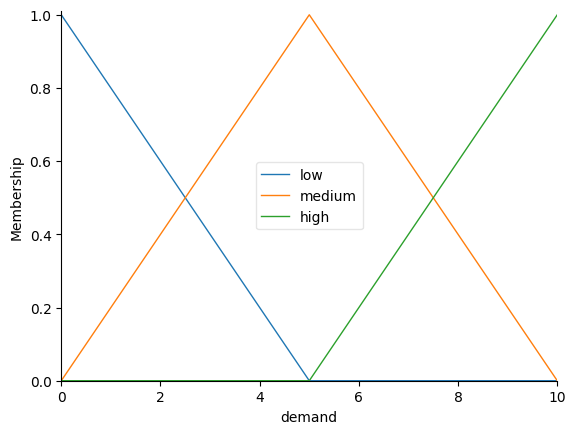

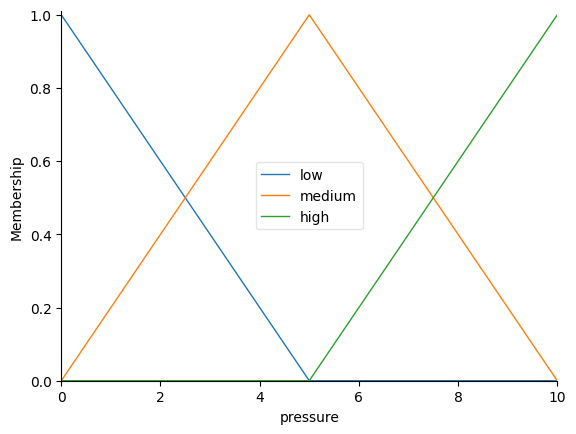

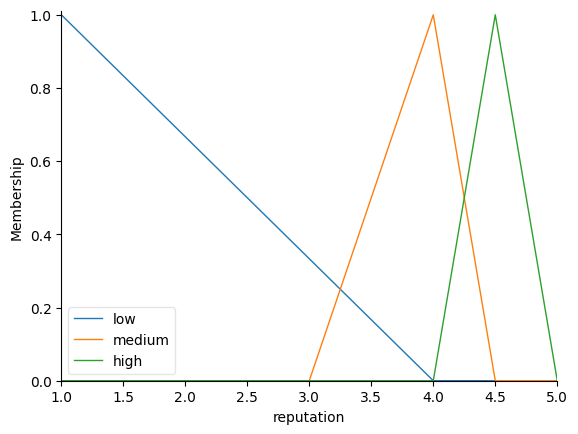

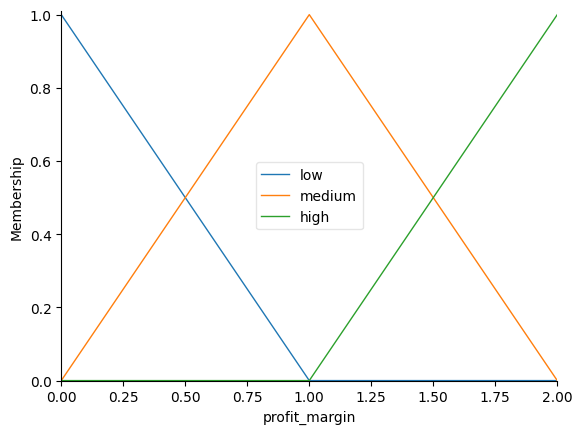

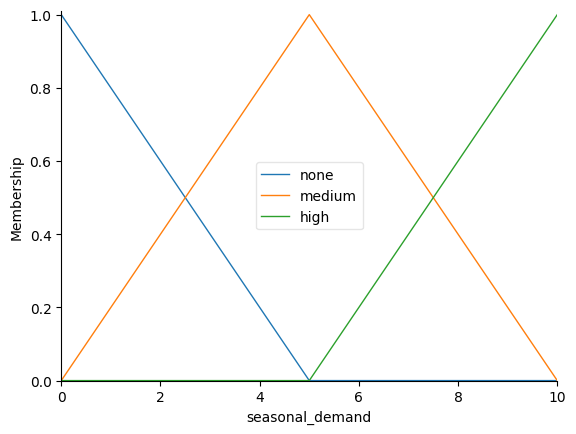

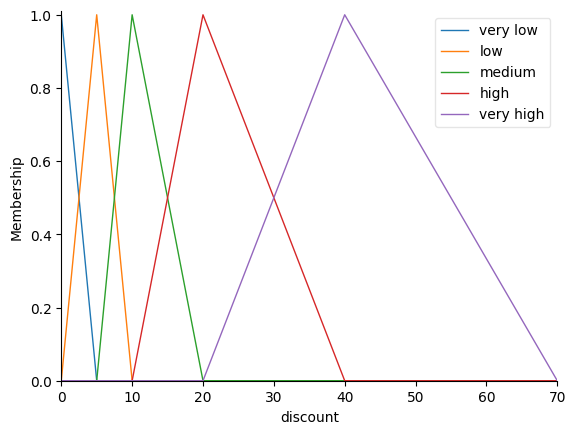

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,10.1,1), 'demand')
pressure=ctrl.Antecedent(np.arange(0,10.1,1),'pressure')
reputation=ctrl.Antecedent(np.arange(1,5.1,0.5), 'reputation')
profit_margin=ctrl.Antecedent(np.arange(0,2.1,1), 'profit_margin')
seasonal_demand=ctrl.Antecedent(np.arange(0,10.1,1), 'seasonal_demand')
discount = ctrl.Consequent(np.arange(0,70.1,1), 'discount')
demand['low']=fuzz.trimf(demand.universe, [0,0,5])
demand['medium']=fuzz.trimf(demand.universe, [0,5,10])
demand['high']=fuzz.trimf(demand.universe, [5,10,10])
demand.view()
pressure['low']=fuzz.trimf(pressure.universe, [0,0,5])
pressure['medium']=fuzz.trimf(pressure.universe, [0,5,10])
pressure['high']=fuzz.trimf(pressure.universe, [5,10,10])
pressure.view()
reputation['low']=fuzz.trimf(reputation.universe, [1,1,4])
reputation['medium']=fuzz.trimf(reputation.universe, [3,4,4.5])
reputation['high']=fuzz.trimf(reputation.universe, [4,4.5,5])
reputation.view()
profit_margin['low']=fuzz.trimf(profit_margin.universe, [0,0,1])
profit_margin['medium']=fuzz.trimf(profit_margin.universe, [0,1,2])
profit_margin['high']=fuzz.trimf(profit_margin.universe, [1,2,2])
profit_margin.view()
seasonal_demand['none']=fuzz.trimf(seasonal_demand.universe, [0,0,5])
seasonal_demand['medium']=fuzz.trimf(seasonal_demand.universe, [0,5,10])
seasonal_demand['high']=fuzz.trimf(seasonal_demand.universe, [5,10,10])
seasonal_demand.view()
discount['very low']=fuzz.trimf(discount.universe, [0,0,5])
discount['low']=fuzz.trimf(discount.universe, [0,5,10])
discount['medium']=fuzz.trimf(discount.universe, [5,10,20])
discount['high']=fuzz.trimf(discount.universe, [10,20,40])
discount['very high']=fuzz.trimf(discount.universe, [20,40,70])
discount.view()

In [ ]:
rule1=ctrl.Rule(demand['high'] | pressure['low'] | profit_margin['low'], discount['very low'])
rule2=ctrl.Rule(demand['low'] | pressure['high'] | profit_margin['high'], discount['high'])
rule3=ctrl.Rule(reputation['high'] | seasonal_demand['high'] | profit_margin['medium'], discount['medium'])
rule4=ctrl.Rule(seasonal_demand['high'] | pressure['high'] | profit_margin['high'], discount['very high'])
rule5=ctrl.Rule(demand['medium'] | reputation['low'] | profit_margin['low'], discount['medium'])
rule6=ctrl.Rule(demand['high'] | seasonal_demand['none'] | pressure['low'], discount['very low'])
rule7=ctrl.Rule(seasonal_demand['medium'] | pressure['medium'] | profit_margin['high'], discount['medium'])

giảm giá: 32.46184738955824


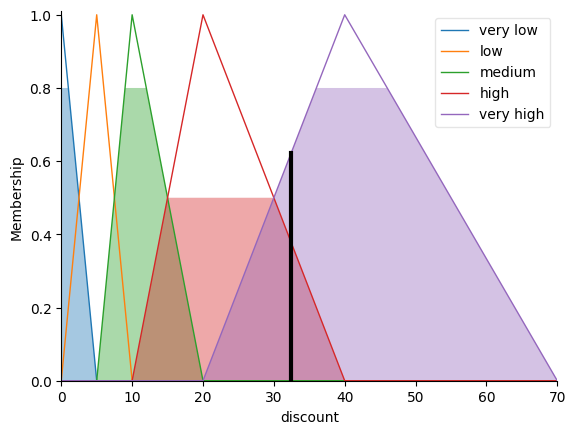

In [ ]:
discount_percentage = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(discount_percentage)
fuzzy_system.input['demand']=9
fuzzy_system.input['pressure']=4
fuzzy_system.input['profit_margin']=1.5
fuzzy_system.input['seasonal_demand']=9
fuzzy_system.input['reputation']=4.2
fuzzy_system.compute()
print("giảm giá:", fuzzy_system.output['discount'])
discount.view(sim=fuzzy_system)